# Cuarto desafío

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import scipy.stats as stats

# Predicción de enfermedades genéticas

En el siguiente dataset, se tiene información de pacientes pediatricos con diferentes enfermedades genéticas. Una efermedad genética es comúnmente causada por anomalías o mutaciones del ADN, es bien sabido que muchas de estas enfermedades son hereditarias o se dan debido a exposiciones a radiación, consumo de sustancias o una exposición ambiental fuerte. Debido a los elevados costos que conlleva realizar test de dichas enfermedades se quiere plantear la posibilidad de realizar un modelo predictivo haciendo uso de Machine Learning. Las variables de este dataset son en su mayoría categóricas, el dataset incluye datos demográficos del paciente, la información de antecedentes genéticas en sus padres, signos vitales, información relevante durante el embarazo y la enfermedad genética que se le ha diagnosticado. 

In [14]:
path = 'C:/Users/USA/Downloads/archive (2)/'
file_name = 'train_genetic_disorders'

#Leo el archivo con pandas
df3 = pd.read_csv(path + file_name + '.csv')
df3=df3.dropna(how="all")
fil3,col3=df3.shape
fil3,col3

(21011, 45)

In [3]:
#Encabezado de mis datos
pd.set_option('display.max_columns', None)
df3.head(45)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,NaN,63.0,Not applicable,-,Alive,Normal (30-60),NaN,NaN,0.0,0.0,1.0,0.0,NaN,Low,Male,No record,Not applicable,Home,NaN,Yes,No,Not applicable,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,40.0,NaN,Not applicable,-,Alive,Tachypnea,Normal,0.0,0.0,NaN,1.0,0.0,Yes,Low,NaN,No record,Not applicable,Home,Yes,Yes,No,-,No,Yes,1.0,Singular,9.836351,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,45.0,44.0,Lemuel Shattuck Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 021

In [4]:
#Quiero ver un porcentaje de mis valores nulos y definir si realmente los necesito 
df3.isnull().mean().sort_values(ascending = False)

Family Name                                         0.439770
Mother's age                                        0.272143
Father's age                                        0.270763
Institute Name                                      0.231307
Maternal gene                                       0.128219
Symptom 2                                           0.100519
H/O substance abuse                                 0.099472
Test 5                                              0.098615
Follow-up                                           0.098520
Disorder Subclass                                   0.098425
History of anomalies in previous pregnancies        0.098329
Gender                                              0.098187
Respiratory Rate (breaths/min)                      0.097996
Birth asphyxia                                      0.097949
Symptom 1                                           0.097854
Symptom 5                                           0.097806
No. of previous abortion

In [5]:
df3.select_dtypes(exclude = 'object').describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df3.select_dtypes(include = 'object').describe()


,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,21011,21011,20724,18317,21011,21011,11771,21011,16151,21011,21011,18952,18986,18991,18941,18948,18953,20045,18993,18998,18959,18964,18921,19007,18945,18959,18977,18962,18943
unique,21011,2,2,2,2,2480,6051,15777,27,26,2,2,2,1,2,3,4,4,2,2,2,4,4,2,2,2,4,3,9
top,PID0x6418,Yes,No,Yes,No,James,Smith,Sager,Not applicable,-,Alive,Normal (30-60),Normal,Yes,Low,Ambiguous,Yes,Not applicable,Institute,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,12509,12508,10125,11887,394,151,6,8011,10386,10572,9595,9715,18991,9564,6385,4839,10572,9591,9625,9500,4807,4797,9555,9605,9509,4855,9686,4893


Text(0, 0.5, 'Porcentaje de NaN')

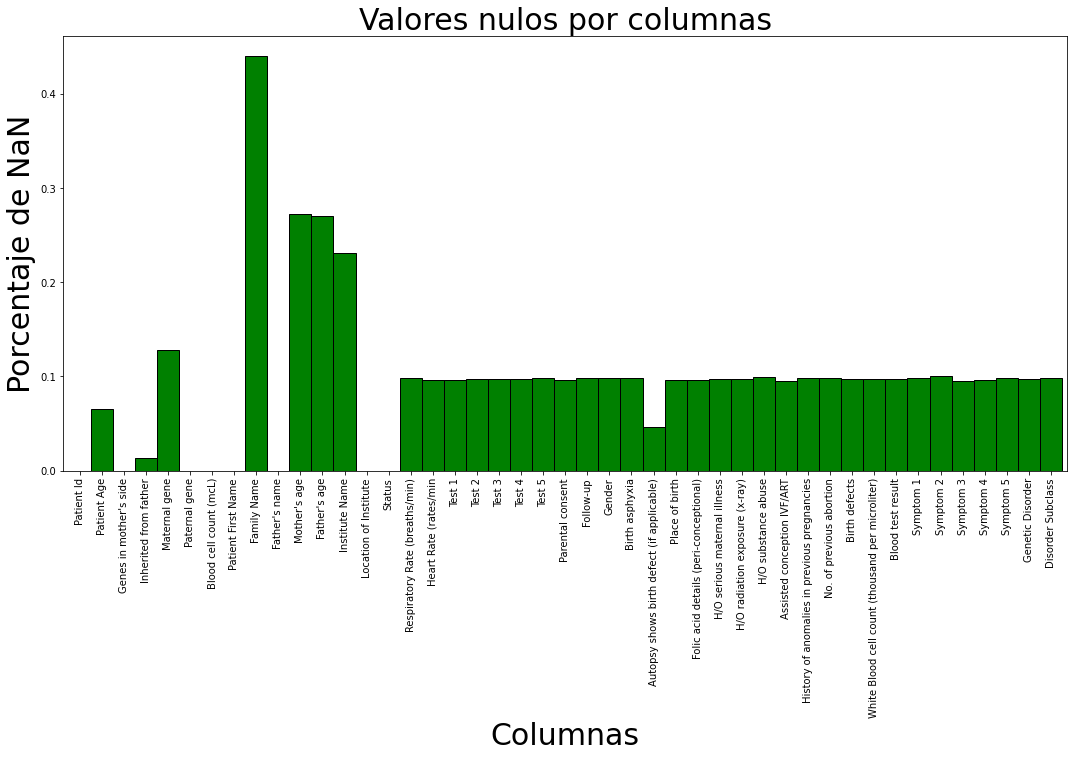

In [7]:
#Grafico valores nulos
nulos3 = df3.isnull().mean()
axes = nulos3.plot.bar(title="Valores nulos por columnas",color="green",rot=90, width=1.0,figsize=(18,8),edgecolor = "black")
axes.title.set_size(30)
axes.set_xlabel("Columnas",fontsize=30)
axes.set_ylabel("Porcentaje de NaN",fontsize=30)


# Imputación de valores nulos

In [8]:
#En las varibles de test pareciera que hay varios varios nulos, quiero ver los valores que toman
tests = ['Test 1','Test 2','Test 3','Test 4','Test 5']
for col in tests:
    print(col)
    print(df3[col].unique())
    print("\n")


Test 1
[ 0. nan]


Test 2
[nan  0.]


Test 3
[nan  0.]


Test 4
[ 1. nan]


Test 5
[ 0. nan]




In [17]:

def filtro(df3):
    
    imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    
    #Voy a cambiar los NaN de los test por -99
    df3['Test 1']=df3['Test 1'].fillna(-99)
    df3['Test 2']=df3['Test 2'].fillna(-99)
    df3['Test 3']=df3['Test 3'].fillna(-99)
    df3['Test 4']=df3['Test 4'].fillna(-99)
    df3['Test 5']=df3['Test 5'].fillna(-99)
    
    df3['Symptom 1']=df3['Symptom 1'].fillna(-99)
    df3['Symptom 2']=df3['Symptom 2'].fillna(-99)
    df3['Symptom 3']=df3['Symptom 3'].fillna(-99)
    df3['Symptom 4']=df3['Symptom 4'].fillna(-99)
    df3['Symptom 5']=df3['Symptom 5'].fillna(-99)
    
    df3["Mother's age"]=df3["Mother's age"].fillna(int(df3["Mother's age"].mean()))
    df3["Father's age"]=df3["Father's age"].fillna(int(df3["Father's age"].mean()))
    df3["Patient Age"]=df3["Patient Age"].fillna(int(df3["Patient Age"].mean()))

    imp_cat= imp_cat.fit(df3[['Blood test result',"Folic acid details (peri-conceptional)",
                                                "H/O radiation exposure (x-ray)","H/O substance abuse",
                                                "Follow-up","Birth defects"]])
    
    df3[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]]=imp_cat.transform(df3[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]])
    #Quitar valores como "-"
    df3['H/O radiation exposure (x-ray)']=df3['H/O radiation exposure (x-ray)'].replace('-','others')
    df3['H/O substance abuse']=df3['H/O substance abuse'].replace('-','others')
    #Decidí sobre algunas columnas que deseo remover
    df3.drop(columns = ["Institute Name","Location of Institute", "Family Name","Father's name","Parental consent","Patient First Name","Patient Id",'Place of birth'], inplace=True)
    
filtro(df3)   
    

In [10]:
df3.isnull().mean().sort_values(ascending = False)

Maternal gene                                       0.128219
Disorder Subclass                                   0.098425
History of anomalies in previous pregnancies        0.098329
Gender                                              0.098187
Respiratory Rate (breaths/min)                      0.097996
Birth asphyxia                                      0.097949
No. of previous abortion                            0.097758
H/O serious maternal illness                        0.097663
Genetic Disorder                                    0.097520
White Blood cell count (thousand per microliter)    0.097378
Heart Rate (rates/min                               0.096378
Assisted conception IVF/ART                         0.095379
Autopsy shows birth defect (if applicable)          0.045976
Inherited from father                               0.013660
H/O substance abuse                                 0.000000
Symptom 5                                           0.000000
Symptom 4               

Los valores nulos que se imputaron se hicieron de acuerdo a ciertos estándares y la importancia de dicha columna. Sin embargo, hay valores nulos que no supe muy bien cómo quitarlos, si debía quitarlos o simplemente que otro valor debía ponerle...

# Relaciones entre variables, gráficos y algunos insights

In [11]:
#Tengo dos posibles variables target
df3 = df3.dropna(subset= ['Genetic Disorder', 'Disorder Subclass'])
target1 = df3['Genetic Disorder']
target2 = df3['Disorder Subclass']
print(f"target 1 : {target1.unique()}")
print("\n")
print(f"target 2 : {target2.unique()}")

target 1 : ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']


target 2 : ["Leber's hereditary optic neuropathy" 'Diabetes' 'Leigh syndrome'
 'Cancer' 'Cystic fibrosis' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


A pesar de tener dos variables target, por temas de facilidad sería mejor tomar target 1 como el objetivo de predicción. 

Text(0.5, 1.0, 'Géneros de los pacientes')

<Figure size 432x288 with 0 Axes>

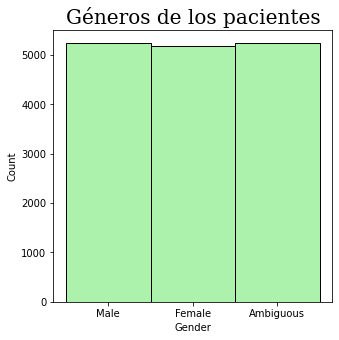

In [12]:
#Quiero conocer un poco más a los pacientes 
plt.figure()
plt.subplots(1,1,figsize=(5,5))
sns.histplot(data=df3,x="Gender", binwidth=3,color="lightgreen")
plt.title("Géneros de los pacientes",fontdict={'family': 'serif', 
                    'size': 20},loc='center')

([<matplotlib.patches.Wedge at 0x24c67bcca48>,
 [Text(0.14667157748406365, 1.191002707116292, 'Mitochondrial genetic inheritance disorders'),
  Text(-1.097933662790685, -0.06739192912382465, 'NA'),
  Text(-0.8659661769957742, -0.6783086172969675, 'Multifactorial genetic inheritance disorders'),
  Text(0.508577851888236, -0.975370990223078, 'Single-gene inheritance diseases')],
 [Text(0.08555842019903713, 0.6947515791511704, '46.1%'),
  Text(-0.5988729069767372, -0.03675923406754071, '9.8%'),
  Text(-0.4723451874522404, -0.36998651852561854, '9.4%'),
  Text(0.27740610102994684, -0.5320205401216789, '34.7%')])

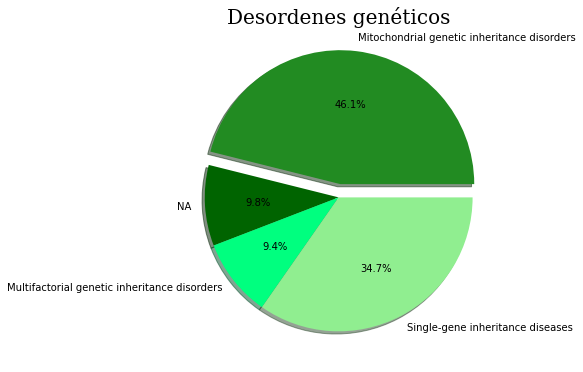

In [15]:
df3["Genetic Disorder"].fillna("NA",inplace=True)
#De mis datos, tomé la columna con los desordenes genéticos y cambié los valores nulos por NA= No Answer


issue=df3["Genetic Disorder"].unique()
#issue es una lista con valores no repetidos 
issue[1]="NA"



dataBySamp=[df3[df3["Genetic Disorder"]==x] for x in issue]
#Lo que hice en la línea anterior fue crear una lista llamada dataBySamp que contiene de forma organizada 
#...los pacientes con las 4 diferentes issues 
numero_pacientes=[] 
#con el siguiente for lo que hago es contar cuántos pacientes tienen x issue y ese valor guardarlo en la 
#...lista numero_pacientes
for i in range(len(dataBySamp)):
    numero_pacientes.append(len((dataBySamp[i]["Genetic Disorder"])))
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(6,8))
plt.title("Desordenes genéticos", 
          fontdict={'family': 'serif', 
                    'size': 20},
          loc='center')


plt.pie(numero_pacientes,labels=issue, autopct='%1.1f%%',explode=explode,shadow=True,colors=["forestgreen","darkgreen","springgreen","lightgreen"])



([<matplotlib.patches.Wedge at 0x24c67c4e508>,
 [Text(1.0954726063590219, 0.0996983887380928, "Leber's hereditary optic neuropathy"),
  Text(0.8611780303009579, 0.6843773813671538, 'Cystic fibrosis'),
  Text(0.16296672433464746, 1.0878611339503013, 'Diabetes'),
  Text(-0.896389219226665, 0.7978009574162028, 'Leigh syndrome'),
  Text(-1.2997872457458255, -0.023518413987362315, 'Cancer'),
  Text(-0.9979921623990812, -0.4626139252011401, 'Tay-Sachs'),
  Text(-0.5669561962669665, -0.9426349619627383, 'Hemochromatosis'),
  Text(0.30381057132558215, -1.0572129098487322, 'Mitochondrial myopathy'),
  Text(1.0319955119347939, -0.3807693046274121, 'NA'),
  Text(1.0997306754440945, -0.024340120937987764, "Alzheimer's")],
 [Text(0.5975305125594664, 0.05438093931168697, '2.9%'),
  Text(0.4697334710732497, 0.37329675347299296, '15.6%'),
  Text(0.08889094054617133, 0.5933788003365279, '8.3%'),
  Text(-0.5228937112155546, 0.4653838918261183, '23.3%'),
  Text(-0.7998690743051234, -0.014472870146069117,

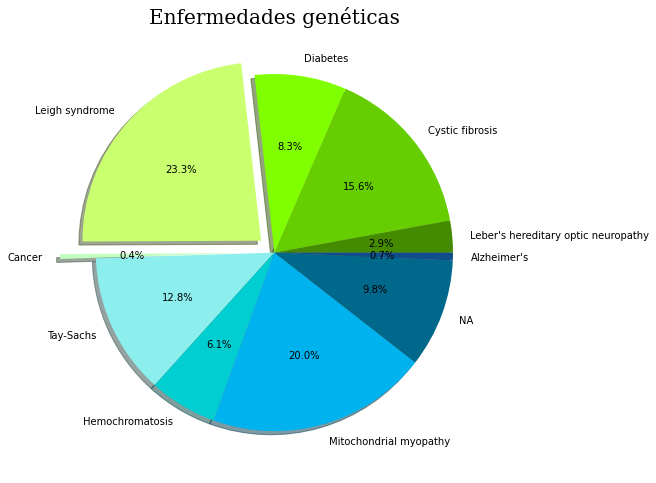

In [16]:
#El siguiente gráfico está basado en la misma lógica del gráfico anterior.
df3["Disorder Subclass"].fillna("NA",inplace=True)

enf=df3["Disorder Subclass"].unique()




dataBySamp=[df3[df3["Disorder Subclass"]==x] for x in enf]
numero_pacientes=[]

for i in range(len(dataBySamp)):
    numero_pacientes.append(len((dataBySamp[i]["Disorder Subclass"])))

explode = (0, 0, 0, 0.1,0.2,0,0,0,0,0) #Me separa una rebanada del pastel
colors=["#458B00","#66CD00","#7FFF00","#CAFF70","#C1FFC1","#8DEEEE","#00CED1","#00B2EE","#00688B","#104E8B"]
plt.figure(figsize=(8,10))
plt.title("Enfermedades genéticas", 
          fontdict={'family': 'serif', 
                    'size': 20},
          loc='center')


plt.pie(numero_pacientes,labels=enf, autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)




Con los anteriores dos pie charts se puede evidenciar que el mayor número de los pacientes padece un transtorno mitocondrial hereditario (43.9%) le sigue pacientes con transtorno hereditario de un solo gen (33%) y transtorno genético multifactorial hereditario (9%). No obstante cabe resaltar que el número de los datos nulos es bastante significativo.

Respecto a las enfermedades, se observa que el mayor número de pacientes padece síndrome de Leigh (22.2%) y la menor es cáncer (0.4%), sin embargo, parece ser que al tomar los datos faltó mencionar qué tipo de cáncer pues se conoce que los tipos de cáncer están asociados potencialmente a transtornos genéticos. Por otro lado, es relevante mencionar la gran cantidad de datos nulos o que probablemente el 14.2% de datos faltantes sean debido a que no se conoce o diagnosticó la enfermedad del paciente.  

In [18]:
a=df3.groupby("Disorder Subclass")
a.mean()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Disorder Subclass,,,,,,,,,,,,,,,,
Alzheimer's,6.527027,4.901682,34.790541,42.722973,-10.033784,-11.371622,-8.027027,-7.108108,-7.358108,2.115942,7.410902,-5.202703,-8.520270,-4.439189,-7.790541,-5.777027
Cancer,7.271739,4.871431,34.597826,40.630435,-12.913043,-6.456522,-9.684783,-7.695652,-7.532609,2.012048,7.710858,-4.108696,-9.597826,-14.989130,-8.586957,-10.750000
Cystic fibrosis,6.876411,4.899041,34.496796,41.701251,-7.673482,-9.758010,-9.365273,-7.056149,-9.274641,2.008375,7.509479,-8.323467,-8.455294,-8.926762,-8.776015,-8.411962
Diabetes,6.806655,4.895089,34.445783,42.056799,-8.917384,-8.860585,-9.882960,-8.409065,-11.132530,2.012571,7.455242,-9.074584,-8.385542,-7.314400,-7.963282,-9.239243
Hemochromatosis,6.798606,4.891687,34.360960,41.772270,-10.199070,-9.508908,-9.125484,-7.675445,-9.278854,1.951092,7.482562,-7.384198,-9.386522,-9.058869,-8.360186,-10.945778
Leber's hereditary optic neuropathy,6.749588,4.897884,34.799012,41.762768,-11.090610,-9.622735,-8.970346,-9.049423,-9.948929,1.958182,7.495460,-9.016474,-8.517298,-5.537068,-7.474465,-9.271829
Leigh syndrome,6.891478,4.904211,34.346004,41.447374,-10.015328,-8.882281,-9.104844,-8.462497,-8.821582,2.014617,7.446263,-8.877580,-9.064991,-8.509095,-9.006131,-9.449009
Mitochondrial myopathy,6.904331,4.896271,34.334841,41.724893,-8.976440,-9.659686,-8.929319,-8.947644,-9.047120,2.021432,7.490973,-9.530462,-9.777963,-8.659448,-8.286054,-8.850547
NA,7.130561,4.898479,34.196809,41.635880,-12.590426,-13.308511,-12.973404,-13.796905,-14.744681,2.002847,7.524348,-13.473888,-13.160542,-14.057544,-13.420696,-11.953095


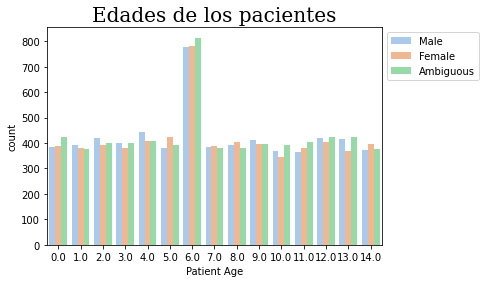

In [19]:
a=df3["Patient Age"].unique()
plt.figure()
plt.title("Edades de los pacientes",fontdict={'family': 'serif','size': 20},loc='center')
sns.countplot(data=df3, x="Patient Age", hue="Gender",palette="pastel")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

<AxesSubplot:title={'center':'Estado de los pacientes'}, xlabel='Status', ylabel='Count'>

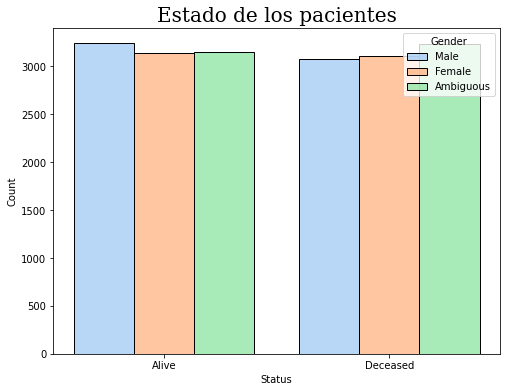

In [20]:
plt.figure(figsize=(8,6))
plt.title("Estado de los pacientes",fontdict={'family': 'serif','size': 20},loc='center')
sns.histplot(data=df3, x="Status", hue="Gender",palette="pastel",multiple="dodge",shrink=.8)


Si se tienen en cuenta las distribuciones de ambas variables, parece ser que el conteo de células rojas (blood cell) es normal, sin embargo, el conteo de células blancas tiene dos extremos marcados de lo cual se puede inferir que una cantidad grande de pacientes posee niveles muy altos o muy bajos, esto tiene sentido pues el conteo de células blancas en sangre nos da información sobre cómo lucha el sistema inmune ante una enfermedad. 

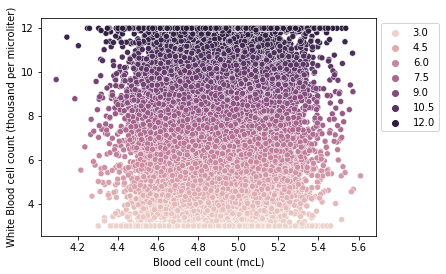

In [21]:
x=df3["White Blood cell count (thousand per microliter)"]
y=df3["Blood cell count (mcL)"]

ax=sns.scatterplot(data=df3,y=x,x=y, hue="White Blood cell count (thousand per microliter)")
ax.legend(bbox_to_anchor=(1, 1))
#Con este scatter realmente no es posible observar algo parecido a una tendencia lineal

(2.8, 12.0)

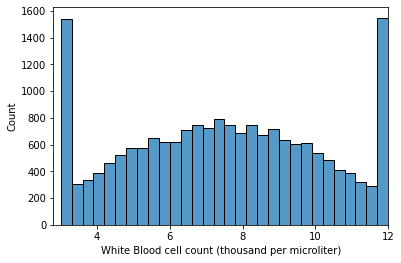

In [22]:
x=df3["White Blood cell count (thousand per microliter)"]
y=df3["Blood cell count (mcL)"]

sns.histplot(x)
plt.xlim(2.8,12)
#Las dos colas extremas de los datos concuerda con lo esperado para enfermades. 


<AxesSubplot:ylabel='White Blood cell count (thousand per microliter)'>

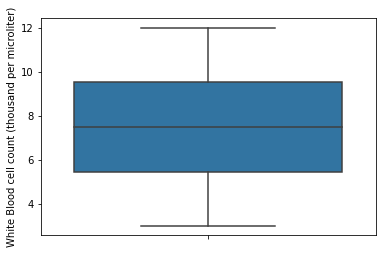

In [23]:
sns.boxplot(data=df3, y=x)

<AxesSubplot:xlabel='Blood cell count (mcL)', ylabel='Count'>

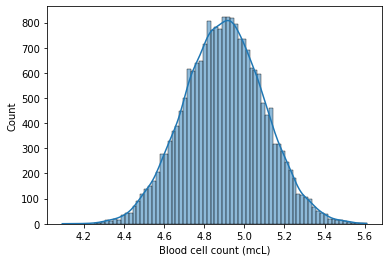

In [24]:
sns.histplot(y,kde=True)

<AxesSubplot:ylabel='Blood cell count (mcL)'>

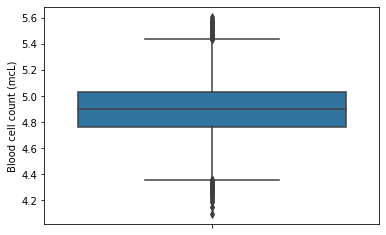

In [25]:
sns.boxplot(data=df3, y=y)

In [26]:
#Quisiera ver si hay alguna correlación entre estas dos variables 
from sklearn.impute import SimpleImputer
#Debido a los valores nulos
imput = SimpleImputer(missing_values=np.nan, strategy="mean")
df3["White Blood cell count imp"] = imput.fit_transform(df3[["White Blood cell count (thousand per microliter)"]])
x=df3["White Blood cell count imp"]
df3["Blood cell count imp"] = imput.fit_transform(df3[["Blood cell count (mcL)"]])
y=df3["Blood cell count imp"]
np.corrcoef(x, y)
#Viendo la matriz, se descarta una correlación


array([[1.        , 0.00101037],
       [0.00101037, 1.        ]])

Text(0, 0.5, ' ')

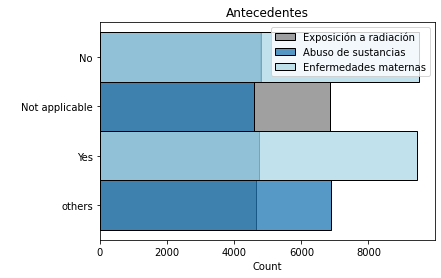

In [27]:

sns.histplot(data=df3, y="H/O radiation exposure (x-ray)",color="gray",label="Exposición a radiación")
sns.histplot(data=df3, y="H/O substance abuse",label="Abuso de sustancias")
sns.histplot(data=df3, y="H/O serious maternal illness",color="lightblue",label="Enfermedades maternas")
plt.legend()
plt.title("Antecedentes")
plt.ylabel(" ")

Text(0.5, 0, ' ')

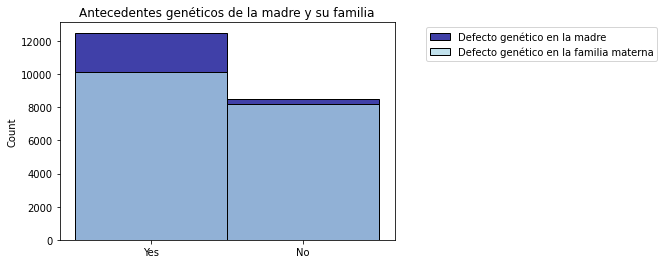

In [28]:



sns.histplot(data=df3, x="Genes in mother's side",color="darkblue",label="Defecto genético en la madre")
sns.histplot(data=df3, x="Maternal gene",color="lightblue",label="Defecto genético en la familia materna")

plt.legend()
plt.legend(bbox_to_anchor=(1.8,1), loc="upper right")


plt.title("Antecedentes genéticos de la madre y su familia")
plt.xlabel(" ")

Text(0.5, 0, ' ')

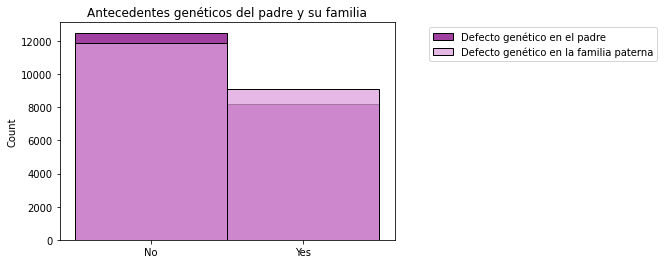

In [29]:
sns.histplot(data=df3, x="Inherited from father",color="purple",label="Defecto genético en el padre")
sns.histplot(data=df3, x="Paternal gene",color="plum",label="Defecto genético en la familia paterna")
plt.legend()
plt.legend(bbox_to_anchor=(1.8,1), loc="upper right")


plt.title("Antecedentes genéticos del padre y su familia")
plt.xlabel(" ")

Text(0.5, 1.0, 'Síntomas vitales')

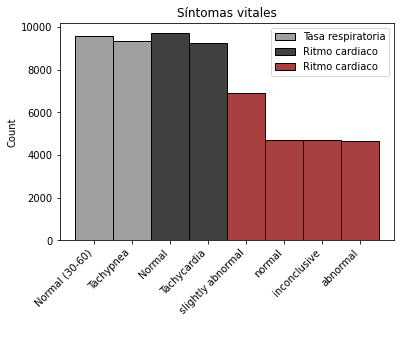

In [30]:
sns.histplot(data=df3, x="Respiratory Rate (breaths/min)",color="gray",label="Tasa respiratoria")
sns.histplot(data=df3, x="Heart Rate (rates/min",color="black",label="Ritmo cardiaco")
sns.histplot(data=df3, x="Blood test result",color="darkred",label="Ritmo cardiaco")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.xlabel(" ")
plt.title("Síntomas vitales")

Text(0.5, 1.0, 'Antecedentes del embarazo')

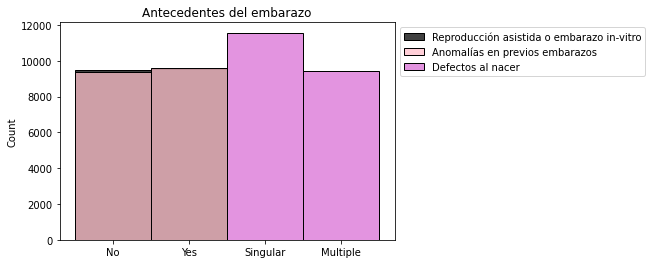

In [31]:
sns.histplot(data=df3, x="Assisted conception IVF/ART",label="Reproducción asistida o embarazo in-vitro",color="black")
sns.histplot(data=df3, x="History of anomalies in previous pregnancies",color="pink",label="Anomalías en previos embarazos")
ax=sns.histplot(data=df3, x="Birth defects",color="orchid",label="Defectos al nacer")


ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel(" ")
plt.title("Antecedentes del embarazo")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

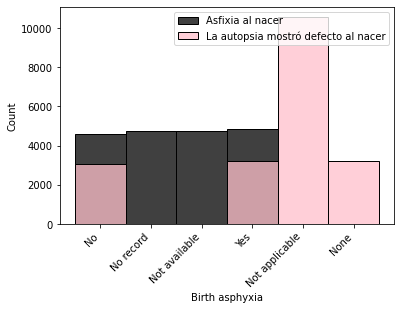

In [32]:
sns.histplot(data=df3, x="Birth asphyxia",label="Asfixia al nacer",color="black")
ax=sns.histplot(data=df3, x="Autopsy shows birth defect (if applicable)",color="pink",label="La autopsia mostró defecto al nacer")
ax.legend(bbox_to_anchor=(2.5, 2.5))
plt.legend()
plt.xticks(rotation=45, ha='right')


([<matplotlib.axis.XTick at 0x24c6a195648>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

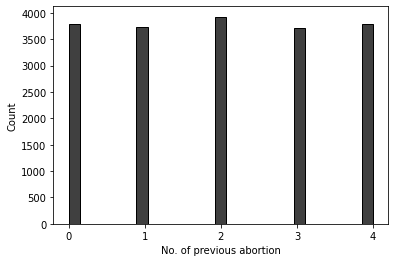

In [33]:
sns.histplot(data=df3, x=df3["No. of previous abortion"],color="black",label="Ritmo cardiaco")
listOf_xticks = np.arange(0, 5, 1)
plt.xticks(listOf_xticks)

# Correlaciones

# Para variables categóricas se usó correlación de cramers $V$

In [34]:
#Esta función la implementé para ver de a pares, ya que son muchos datos y queda una tabla muy grande
def correlation(x,y):
    x.unique()
    y.unique()
    crosstab = pd.crosstab(x, y)
    X2 = stats.chi2_contingency(crosstab, correction=False)[0]
    N = crosstab.sum().sum()
    k = x.nunique()
    r = y.nunique()
    V = np.sqrt((X2/N)/min(k-1,r-1))
    return V

correlation(df3["Disorder Subclass"],df3["Genetic Disorder"])

0.7407953494265592

In [35]:

import association_metrics as am

df3 = df3.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)


cramersv = am.CramersV(df3) 
# La función de arriba me retorna una matriz cuadrada con los valores de Cramer's V
cramersv.fit()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
Genes in mother's side,1.000000,0.007443,0.100761,0.008807,0.000212,0.001038,0.001075,0.007872,0.006564,0.014435,0.003963,0.001026,0.002104,0.005936,0.014595,0.004356,0.009257,0.001539,0.015074,0.089115,0.189477
Inherited from father,0.007443,1.000000,0.011608,0.093815,0.013139,0.013181,0.010413,0.004545,0.004550,0.012913,0.012272,0.001828,0.006020,0.015386,0.010175,0.011608,0.008675,0.010772,0.012452,0.087826,0.178853
Maternal gene,0.100761,0.011608,1.000000,0.010131,0.007687,0.009854,0.008939,0.004311,0.012450,0.007524,0.010962,0.002696,0.003644,0.014272,0.007583,0.019739,0.011352,0.009625,0.012402,0.076341,0.180228
Paternal gene,0.008807,0.093815,0.010131,1.000000,0.014619,0.002339,0.005069,0.002714,0.005789,0.009259,0.018891,0.002084,0.001192,0.004561,0.006438,0.004748,0.001067,0.000512,0.009711,0.070996,0.159177
Status,0.000212,0.013139,0.007687,0.014619,1.000000,0.010583,0.006595,0.002141,0.016403,0.012335,1.000000,0.002649,0.001753,0.006583,0.008670,0.004744,0.002618,0.004001,0.010737,0.005468,0.018361
Respiratory Rate (breaths/min),0.001038,0.013181,0.009854,0.002339,0.010583,1.000000,0.009026,0.005353,0.007481,0.015997,0.013449,0.011502,0.012499,0.007738,0.008714,0.002688,0.016125,0.002730,0.009116,0.013176,0.014255
Heart Rate (rates/min,0.001075,0.010413,0.008939,0.005069,0.006595,0.009026,1.000000,0.003096,0.002420,0.007078,0.014630,0.014372,0.011336,0.007639,0.007755,0.005583,0.011394,0.008561,0.004559,0.011308,0.025645
Follow-up,0.007872,0.004545,0.004311,0.002714,0.002141,0.005353,0.003096,1.000000,0.002550,0.013830,0.004303,0.007882,0.007044,0.008127,0.015440,0.011027,0.001612,0.009900,0.015109,0.014669,0.031988
Gender,0.006564,0.004550,0.012450,0.005789,0.016403,0.007481,0.002420,0.002550,1.000000,0.015596,0.014594,0.009153,0.028412,0.013276,0.009267,0.009238,0.012341,0.006999,0.012377,0.013266,0.021464
Birth asphyxia,0.014435,0.012913,0.007524,0.009259,0.012335,0.015997,0.007078,0.013830,0.015596,1.000000,0.015085,0.009008,0.015936,0.007133,0.011362,0.018302,0.016579,0.004836,0.014205,0.011605,0.018819


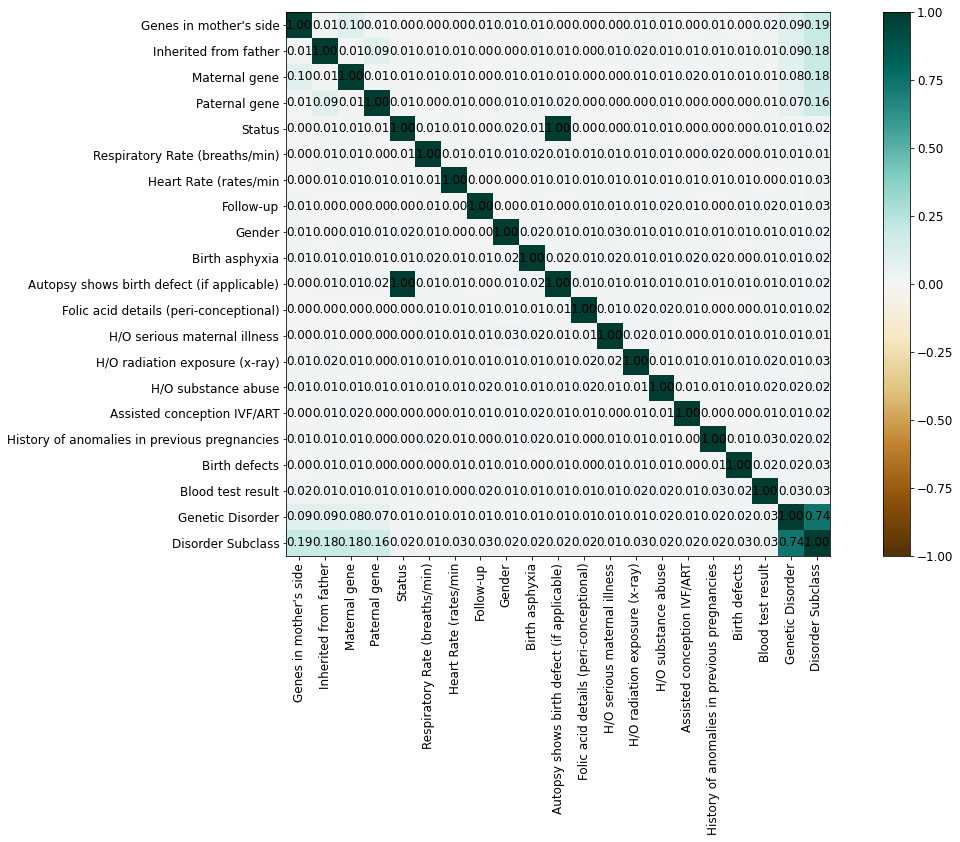

In [36]:
cfit = cramersv.fit().round(2)
# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (19, 10))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='BrBG', vmin=-1, vmax=1)

# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 90)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

# Para variables numéricas se utilizó correlación de Pearson 

<AxesSubplot:>

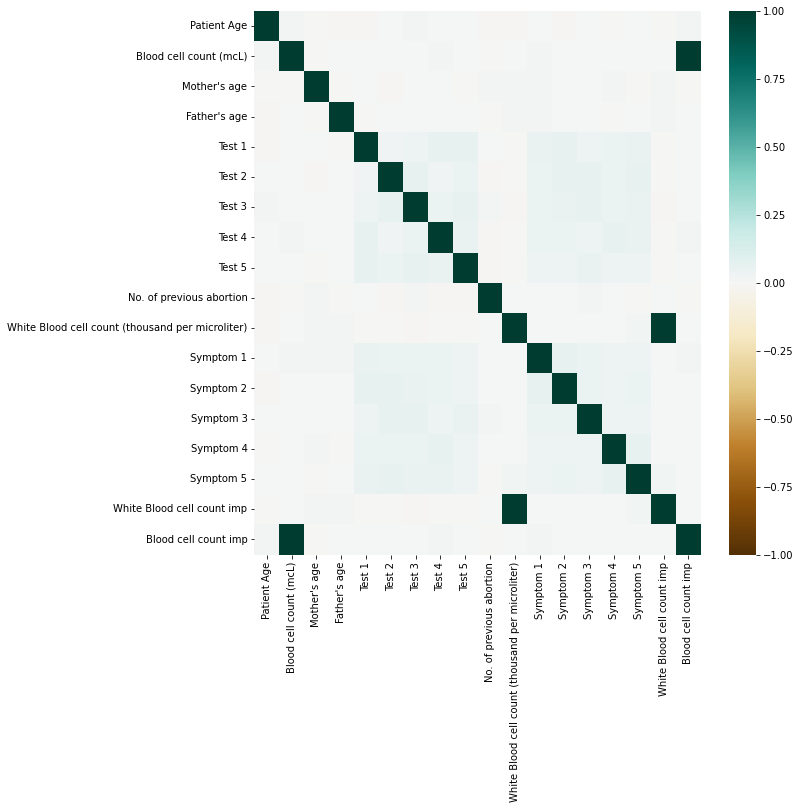

In [37]:
num_cols = df3.select_dtypes(include=np.number).columns
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(df3[num_cols].corr("pearson"), cmap='BrBG', vmin=-1)

Aparentemente no se encontraron correlaciones tanto para las variables numéricas como las categóricas, excepto para las dos variables target que como se esperaba están correlacionadas.
